<a href="https://colab.research.google.com/github/emanuel379/Metodos-Nao-Parametricos/blob/main/Trabalho_1_3_N%C3%A3o_Param%C3%A9tricos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SME0810 - Métodos Não-Paramétricos: Trabalho 1/3

Ada Maris Pereira Mário - 12725432

Emanuel Victor da Silva Favorato - 12558151

##Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import binom
from scipy.stats import wilcoxon
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from statsmodels.stats.contingency_tables import mcnemar
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import median_test
from scipy.stats import ks_2samp
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency
from scipy.stats import fisher_exact

# Descrição do problema

Um dos assuntos mais abordados no setor de tecnologia no presente momento é a soberania estado-unidense e a defasagem dos salários europeus com relação aos norte-americanos. Neste trabalho, serão investigados os salários dos profissionais de ciência de dados nas duas regiões e se essa discrepância é real, ou se trata de apenas especulação financeira.

##Dados

EN: Entry Level \
MI: Mid Level \
SE: Senior Level \
EX: Executive Level \

\
FT: Full Time \
PT: Part Time \
CT: Contract basis \
FL: Freelancer \

\
S: Small \
M: Medium \
L: Large

In [ ]:
df = pd.read_csv('/content/ds_salaries.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [ ]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [ ]:
print(df['experience_level'].value_counts())

experience_level
SE    2516
MI     805
EN     320
EX     114
Name: count, dtype: int64


array([[<Axes: title={'center': 'EN'}>, <Axes: title={'center': 'EX'}>],
       [<Axes: title={'center': 'MI'}>, <Axes: title={'center': 'SE'}>]],
      dtype=object)

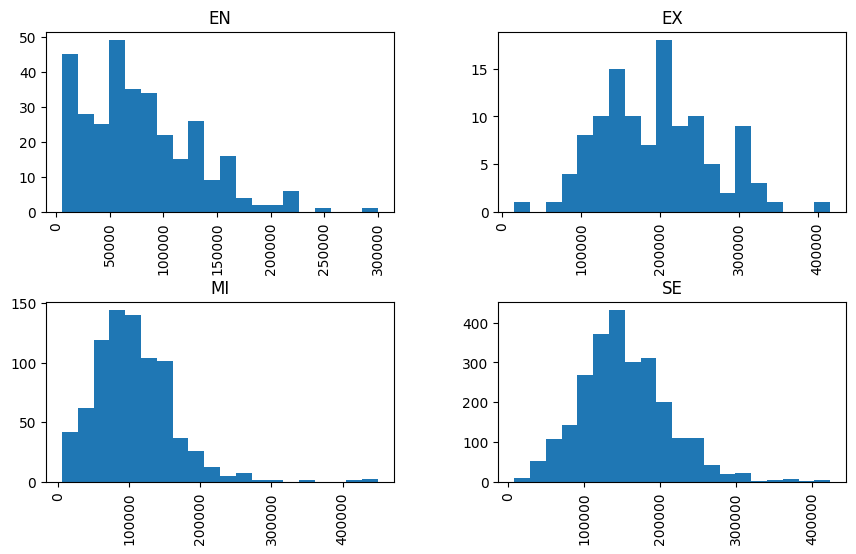

In [ ]:
df.hist(column='salary_in_usd', by='experience_level', figsize=(10, 6), bins=20)

In [ ]:
df.groupby(by=['experience_level'])['salary_in_usd'].quantile(0.6)

,salary_in_usd
experience_level,
EN,82716.8
EX,205000.0
MI,110000.0
SE,160000.0


In [ ]:
df['salary_binary'] = df['salary_in_usd'] > 100000
df.groupby(by=['experience_level'])['salary_binary'].sum()

,salary_binary
experience_level,
EN,85
EX,107
MI,371
SE,2102


In [ ]:
df_us = df[df['employee_residence'] == 'US'] # Dataset para Estados Unidos
df_eu = df[df['salary_currency'] == 'EUR'] # Dataset para União Europeia

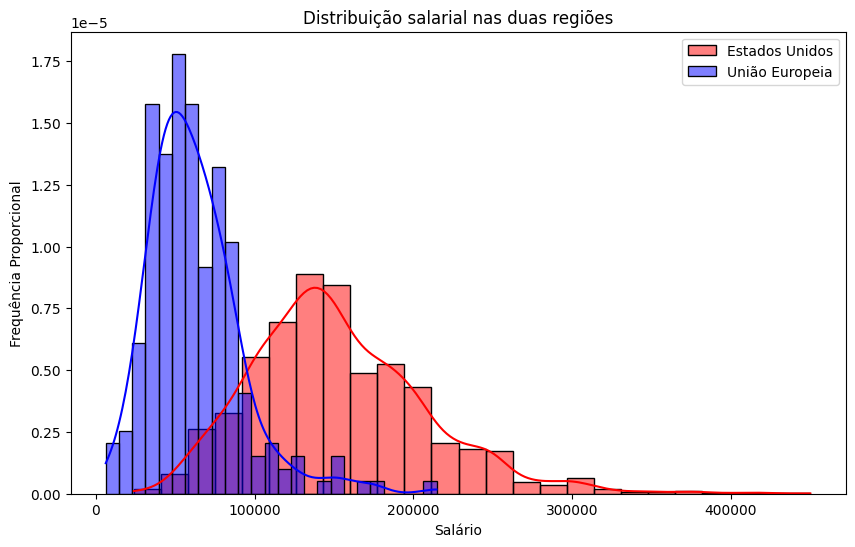

In [ ]:
# Configurando o gráfico
plt.figure(figsize=(10, 6))

# Histogramas com densidade alisada e frequências proporcionais
sns.histplot(df_us['salary_in_usd'], bins=25, kde=True, stat='density', label='Estados Unidos', color='red')
sns.histplot(df_eu['salary_in_usd'], bins=25, kde=True, stat='density', label='União Europeia', color='blue')

# Personalizando o gráfico
plt.xlabel('Salário')
plt.ylabel('Frequência Proporcional')
plt.title('Distribuição salarial nas duas regiões')
plt.legend()

# Exibindo o gráfico
plt.show()

In [ ]:
# Estatísticas de salário por experiência
salary_stats = df.groupby("experience_level")["salary_in_usd"].agg(
    ["min", "max", "mean", "median", "var"]
).reset_index()

# Adicionando proporção por nível de experiência
experience_counts = df["experience_level"].value_counts(normalize=True).reset_index()
experience_counts.columns = ["experience_level", "proportion"]

# Merge das tabelas de experiência
experience_stats = pd.merge(salary_stats, experience_counts, on="experience_level")

# Estatísticas de salário por região
regions = {
    "US": df_us,
    "EU": df_eu
}

region_stats = []
for region, df_region in regions.items():
    stats = df_region["salary_in_usd"].agg(["min", "max", "mean", "median", "var"]).to_dict()
    proportion = len(df_region) / len(df)
    region_stats.append({
        "category": region,
        "proportion": proportion,
        "min": stats["min"],
        "max": stats["max"],
        "mean": stats["mean"],
        "median": stats["median"],
        "var": stats["var"]
    })

region_df = pd.DataFrame(region_stats)

# Renomeando colunas para consistência
experience_stats.rename(columns={"experience_level": "category"}, inplace=True)

# Combinando as tabelas
final_table = pd.concat([experience_stats, region_df], ignore_index=True)

print(final_table)


  category      min       max           mean    median           var  \
0       EN   5409.0  300000.0   78546.284375   70000.0  2.727495e+09   
1       EX  15000.0  416000.0  194930.929825  196000.0  4.993108e+09   
2       MI   5132.0  450000.0  104525.939130  100000.0  2.958020e+09   
3       SE   8000.0  423834.0  153051.071542  146000.0  3.237185e+09   
4       US  24000.0  450000.0  152822.011651  145000.0  3.064662e+09   
5       EU   6304.0  214618.0   62281.733051   59020.0  8.684043e+08   

   proportion  
0    0.085220  
1    0.030360  
2    0.214381  
3    0.670040  
4    0.800000  
5    0.062850  


É possível notar que os salários na União Europeia estão concentrados em faixas de valores muito abaixo quando comparadas aquelas esperadas para trabalhadores nos Estados Unidos.

Para confirmar essa suspeita, serão executados os testes a seguir.

##Teste Qui-Quadrado de Independência

**Hipóteses do teste:** \

$H0: p_1 = p_2$ (A proporção de empregados com salários acima de US$100000 é igual para os níveis de experiência SE e EX)

$H1: p_1 \neq p_2$ (A proporção de empregados com salários acima de US$100000 é diferente para os níveis de experiência SE e EX)

$p_1$: proporção de empregados SE com salários > US$100000

$p_2$: proporção de empregados EX com salários > US$100000

Nível de significância: α = 5%

In [ ]:
data = np.array([[107, 114 - 107],  # EX
                 [2102, 2516 - 2102]])  # SE

print("Tabela de Contingência:")
print(data)

Tabela de Contingência:
[[ 107    7]
 [2102  414]]


In [ ]:
chi2, p, dof, expected = chi2_contingency(data)

print("\nResultados do Teste Qui-Quadrado:")
print(f"Estatística qui-quadrado: {chi2:.4f}")
print(f"p-valor: {p:.4f}")
print(f"Graus de liberdade: {dof}")
print("\nFrequências esperadas:")
print(expected)


Resultados do Teste Qui-Quadrado:
Estatística qui-quadrado: 7.8792
p-valor: 0.0050
Graus de liberdade: 1

Frequências esperadas:
[[  95.7513308   18.2486692]
 [2113.2486692  402.7513308]]


Como $valor-p < α$, rejeita-se $H0$.

**Conclusão:** ao nível α = 5% de significância, os dados fornecem evidências de que há diferenças nas proporções de profissionais da área de Ciência de Dados com salários acima de US$100000 para os níveis de experiência SE e EX.

##Teste Exato de Fisher

Podemos verificar a hipótese anterior fazendo uso do Teste Exato de Fisher, assim, teremos:

**Hipóteses do teste:** \

$H0: p_1 = p_2$ (A proporção de empregados com salários acima de US$100000 é igual para os níveis de experiência SE e EX)

$H1: p_1 \neq p_2$ (A proporção de empregados com salários acima de US$100000 é diferente para os níveis de experiência SE e EX)

$p_1$: proporção de empregados SE com salários > US$100000

$p_2$: proporção de empregados EX com salários > US$100000

Nível de significância: α = 5%

**observação:** o Teste Qui-Quadrado de Independência é mais indicado para a situação anterior, pois, como visto, a frequência esperada de todas as células é maior ou igual a 5.

In [ ]:
# Dados da tabela de contingência
data = np.array([[107, 114 - 107],  # EX
                 [2102, 2516 - 2102]])  # SE

print("Tabela de Contingência:")
print(data)

# Realizando o teste exato de Fisher
odds_ratio, p_value = fisher_exact(data, alternative='two-sided')

# Resultados
print(f"\nRazão de chances (Odds Ratio): {odds_ratio}")
print(f"Valor-p: {p_value}")

Tabela de Contingência:
[[ 107    7]
 [2102  414]]

Razão de chances (Odds Ratio): 3.0106021476145166
Valor-p: 0.0023627297307213945


Como $valor-p < α$, rejeita-se $H0$.

**Conclusão:** ao nível α = 5% de significância, os dados nos trazem evidências de que existem diferenças significativas nas proporções de profissionais da área de Ciência de Dados com salários acima de US$100000 para os níveis de experiência SE e EX.

##Teste da Mediana

# Hipóteses do teste

$H0: p_1 = p_2$ (A renda mediana das duas populações é igual)

$H1: p_1 > p_2$ (A renda mediana nos Estados Unidos é maior que na UE)

$p_1$: renda mediana nos Estados Unidos

$p_2$: renda mediana na União Europeia

Nível de significância: α = 5%

In [ ]:
# Realizando o teste da mediana
stat, p_value, med, tbl = median_test(df_us['salary_in_usd'], df_eu['salary_in_usd'])

# Exibindo a tabela de contingência
print("Tabela de contingência (acima e abaixo da mediana combinada):")
print(tbl)

# Exibindo os resultados
print(f"Mediana combinada: {med}")
print(f"Estatística de teste: {stat}")
print(f"Valor-p: {p_value}")

Tabela de contingência (acima e abaixo da mediana combinada):
[[1610    7]
 [1394  229]]
Mediana combinada: 141300.0
Estatística de teste: 222.33085741590406
Valor-p: 2.805278904787749e-50


Como $valor-p < α$, rejeitamos $H0$.

**Conclusão:** ao nível de significância α = 5%, os dados nos fornecem evidências de que a renda mediana dos profissionais da área de Ciência de Dados nos EUA é significativamente superior a dos europeus.

##Teste das Somas dos Ranks (Wilcoxon, Mann e Whitney)

# Hipóteses do teste

$H0: E(X) = E(Y)$ (A renda média nas duas regiões é a mesma)

$H1: E(X) > E(Y)$ (A renda média nos Estados Unidos é maior que na UE)

$E(X)$: renda média nos Estados Unidos

$E(Y)$: renda média na União Europeia

Nível de significância: α = 5%

In [ ]:
# Realizando o teste U de Mann-Whitney com a hipótese alternativa de que a renda média dos EUA é maior
stat, p_value = mannwhitneyu(df_us['salary_in_usd'], df_eu['salary_in_usd'], alternative='greater')

# Calculando a estatística do teste de Wilcoxon
w = stat + len(df_us) * (len(df_us) + 1) / 2

# Exibindo os resultados
print(f"Estatística do teste U de Mann-Whitney: {stat}")
print(f"Estatística do teste Wilcoxon: {w}")
print(f"Valor p: {p_value}")

Estatística do teste U de Mann-Whitney: 668329.0
Estatística do teste Wilcoxon: 5181839.0
Valor p: 3.270401716064371e-114
A renda média nos Estados Unidos é significativamente maior do que na União Europeia (H1 aceita).


Como $valor-p < α$, rejeitamos $H0$.

**Conclusão:** ao nível de significância α = 5%, os dados nos fornecem evidências de que a renda média dos profissionais de Ciência de Dados nos EUA é significativamente maior que a dos profissionais da União Europeia.

##Teste de Kolmogorov-Smirnov para Duas Amostras

# Hipóteses do teste

$H0: F_X(t) = G_Y(t)$, para todo t real, ou seja, $X$ e $Y$ possuem distribuições similares.

$H1: F_X(t) \neq G_Y(t)$, para pelo menos um t real, ou seja, $X$ e $Y$ não possuem distribuições similares.

$X$: distribuição salarial nos Estados Unidos

$Y$: distribuição salarial na União Europeia

Nível de significância: α = 5%

In [ ]:
# Executando o teste de Kolmogorov-Smirnov para duas amostras
stat, p_value = ks_2samp(df_us['salary_in_usd'], df_eu['salary_in_usd'])

# Exibindo os resultados
print(f"Estatística do teste KS: {stat}")
print(f"Valor-p: {p_value}")

Estatística do teste KS: 0.7853934866505676
Valor-p: 5.485342582255515e-141


Como $valor-p < α$, rejeitamos $H0$.

**Conclusão:** ao nível de significância α = 5%, os dados nos trazem evidências de que a distribuição salarial dos profissionais de Ciência de Dados nos EUA é significativamente diferente daquela observada para os profissionais da União Europeia.